In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import  confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, roc_auc_score,accuracy_score
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

## Importing Dataset

In [2]:
df = pd.read_csv('Iris.csv',index_col='Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


## Check Missing Values

In [4]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Removing Outliers

In [5]:
def remove_outlier(p):
    upper = p.quantile(0.75)
    lower = p.quantile(0.25)
    iqr =upper - lower
    # df.loc[df[numeric]>=df[numeric].quantile(0.75)+iqr*1.5]
    factor=iqr*1.5
    cond = (p>=upper+factor) | (p<=lower-factor)
    p.loc[cond] = p.median()
    return p

df.info()

In [7]:
df.iloc[:,0:-1] = df.iloc[:,0:-1].apply(remove_outlier)

## Checking Class Imbalances

In [8]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<AxesSubplot:>

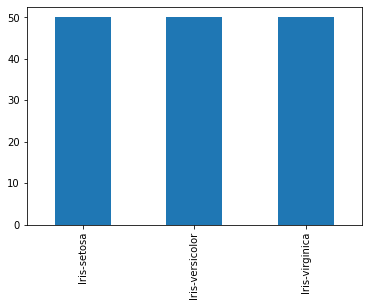

In [9]:
df['Species'].value_counts().plot(kind='bar')

### Visualising Relationship of predictor variables with dependent variable

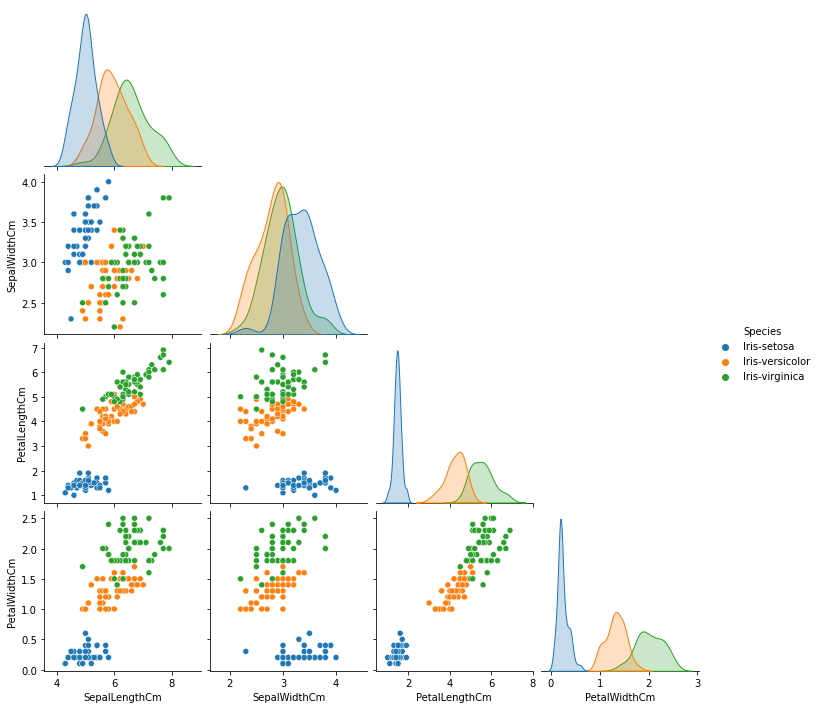

In [10]:
sns.pairplot(data = df , hue = 'Species' , corner=True)

## Data Pre-Processing

In [13]:
species = df['Species'].unique()
species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
df['Species'].replace(species , [0,1,2] , inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [16]:
X = df.iloc[:,0:-1]
y = df['Species']
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [17]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


### Train-Test Split

training - 70%  
testing - 30%

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=43)

### Scaling Data

It is important to note that to maintain independence of training data from testing data, the population parameters used for scaling should ONLY be derived from training dataset and no data from testing should be used for the same.

In [41]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Converting into numpy arrays
This step is not particularly needed but some libraries expect data to be in numpy array format

In [42]:
X = np.array(X)
y = np.array(y)

## Model Training

### Model 1

In [43]:
log_reg_model_1 = LogisticRegression(max_iter = 1000 , random_state=42)
log_reg_model_1.fit(X_train,y_train)
log_reg_model_1.score(X_test,y_test)

0.9555555555555556

In [44]:
y_pred = log_reg_model_1.predict(X_test)

<Figure size 720x504 with 0 Axes>

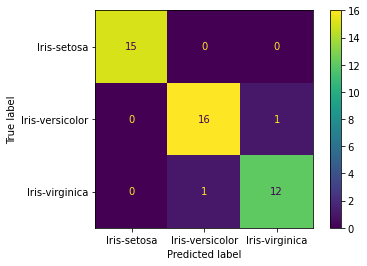

In [45]:
cm = confusion_matrix(y_true=y_test , y_pred=y_pred)
plt.figure(figsize = (10,7))
ConfusionMatrixDisplay(confusion_matrix=cm , display_labels=species).plot()

### Model 2

In [46]:
log_reg_model_2 = LogisticRegression(max_iter = 1000 , multi_class='ovr' , random_state=42)
log_reg_model_2.fit(X_train,y_train)
log_reg_model_2.score(X_test,y_test)

0.9555555555555556

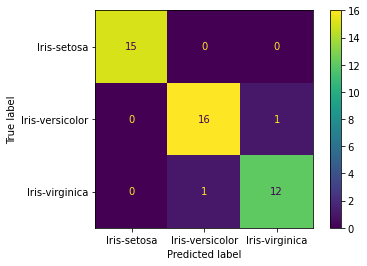

In [47]:
y_pred2 = log_reg_model_2.predict(X_test)
cm = confusion_matrix(y_true=y_test , y_pred=y_pred2)
ConfusionMatrixDisplay(confusion_matrix=cm , display_labels=species).plot()

### Both models provide satisfactory results

## Exploring KNN classifier

In [53]:
#Model Score
scores = []

#Error Rate
error_rate=[] 

# Accuracy
acc = []

## Using Odd Number of Neighbours
neighbours = [i for i in range(2,21) if i%2 == 1]
for i in neighbours:
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    scores.append(knn.score(X_test, y_test))
    error_rate.append(np.mean(y_pred != y_test))
    acc.append(accuracy_score(y_test, y_pred))

## Visualising Working

### Accuracy

Maximum accuracy:- 1.0 at K = 5


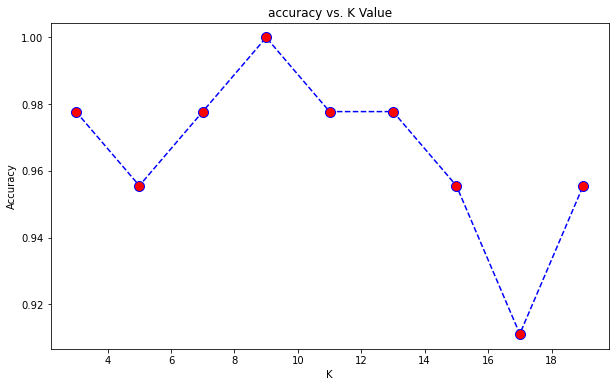

In [54]:
plt.figure(figsize=(10,6))
plt.plot(neighbours,acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc))+2)

Minimum error:- 0.0 at K = 5


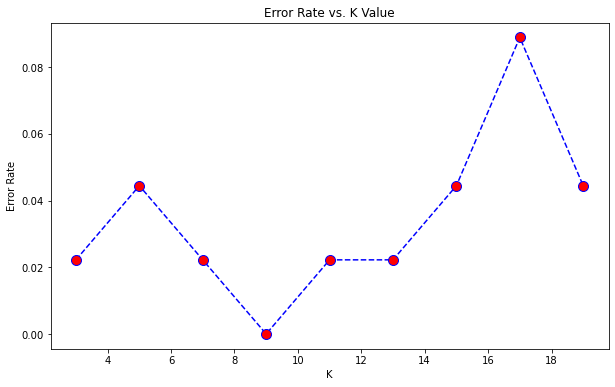

In [55]:
plt.figure(figsize=(10,6))
plt.plot(neighbours,error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+2)

In [56]:
knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
knn.fit(X_train, y_train)
print('Training set score {0:0.2f}'.format(knn.score(X_train, y_train)))
print('Test Set Score {0:0.2f}'.format(knn.score(X_test,y_test)))

Training set score 0.97
Test Set Score 1.00


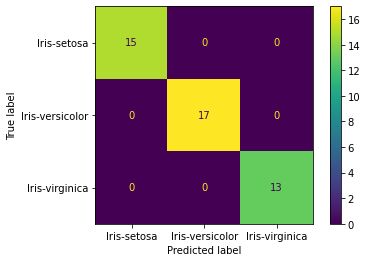

In [57]:
y_pred_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_true=y_test , y_pred=y_pred_knn)
ConfusionMatrixDisplay(confusion_matrix=cm_knn , display_labels=species).plot()

### Comments
While Both Logistic Regression and KNN Classifier work extremely well on the dataset due to very small size of dataset, knn classifier being a lazy learner would probably generalize better to larger datasets and be less computationally expensive than Logistic Regression.